In [1]:
# Import dependencies
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Extract the inflation interest unemployment.csv Data

In [2]:
# Read the data into a polar library DataFrame.
info_df = pl.read_csv('Resources/inflation interest unemployment.csv')
info_df.head()

country,year,"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)",Real interest rate (%),Deposit interest rate (%),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",iso3c,iso2c,adminregion,incomeLevel
str,i64,f64,f64,f64,str,f64,f64,f64,str,str,str,str
"""Afghanistan""",1970,null,null,null,null,null,null,null,"""AFG""","""AF""","""South Asia""","""Low income"""
"""Afghanistan""",1971,null,null,null,null,null,null,null,"""AFG""","""AF""","""South Asia""","""Low income"""
"""Afghanistan""",1972,null,null,null,null,null,null,null,"""AFG""","""AF""","""South Asia""","""Low income"""
"""Afghanistan""",1973,null,null,null,null,null,null,null,"""AFG""","""AF""","""South Asia""","""Low income"""
"""Afghanistan""",1974,null,null,null,null,null,null,null,"""AFG""","""AF""","""South Asia""","""Low income"""


In [3]:
#Check data when is filtered by country
info_df.filter(info_df['country'] == 'United States').head()

country,year,"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)",Real interest rate (%),Deposit interest rate (%),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",iso3c,iso2c,adminregion,incomeLevel
str,i64,f64,f64,f64,str,f64,f64,f64,str,str,str,str
"""United States""",1970,5.838255,5.60217,2.1854,null,7.91,4.9,null,"""USA""","""US""",null,"""High income"""
"""United States""",1971,4.292767,5.069167,0.622605,null,5.723333,5.9,null,"""USA""","""US""",null,"""High income"""
"""United States""",1972,3.272278,4.322751,0.887229,null,5.248333,5.6,null,"""USA""","""US""",null,"""High income"""
"""United States""",1973,6.17776,5.479881,2.409735,null,8.021667,4.9,null,"""USA""","""US""",null,"""High income"""
"""United States""",1974,11.054805,8.998695,1.651064,null,10.798333,5.6,null,"""USA""","""US""",null,"""High income"""


In [4]:
#Remove iso3c', 'iso2c','adminregion','incomeLevel' columns
info_df_remove_column = info_df.drop(['iso3c', 'iso2c','adminregion','incomeLevel'])
info_df_remove_column.head()

country,year,"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)",Real interest rate (%),Deposit interest rate (%),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
str,i64,f64,f64,f64,str,f64,f64,f64
"""Afghanistan""",1970,null,null,null,null,null,null,null
"""Afghanistan""",1971,null,null,null,null,null,null,null
"""Afghanistan""",1972,null,null,null,null,null,null,null
"""Afghanistan""",1973,null,null,null,null,null,null,null
"""Afghanistan""",1974,null,null,null,null,null,null,null


In [5]:
#Filter the date by United States and United Kingdom countries
filtered_df = info_df_remove_column.filter((info_df_remove_column['country'] == 'United States') | (info_df_remove_column['country'] == 'United Kingdom'))
filtered_df

country,year,"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)",Real interest rate (%),Deposit interest rate (%),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
str,i64,f64,f64,f64,str,f64,f64,f64
"""United Kingdom…",1970,6.366568,5.539735,1.620494,"""5.208333333333…",7.25,null,null
"""United Kingdom…",1971,9.444837,7.985625,-0.449712,"""3.833333333333…",7.5,3.3,null
"""United Kingdom…",1972,7.071098,7.188252,0.290842,"""4.145833333333…",7.5,3.7,null
"""United Kingdom…",1973,9.196033,8.414879,-0.382677,"""8.020833333333…",8.0,2.6,null
"""United Kingdom…",1974,16.044011,15.059213,-5.266169,"""9.5""",9.0,2.6,null
"""United Kingdom…",1975,24.207288,25.770728,-12.167407,"""7.083333333333…",10.467692,4.0,null
"""United Kingdom…",1976,16.559523,15.113567,-3.48579,"""7.541666666666…",11.10095,5.5,null
"""United Kingdom…",1977,15.840267,13.710494,-4.220039,"""4.895833333333…",8.911867,5.8,null
"""United Kingdom…",1978,8.263141,11.457547,-2.121343,"""6.083333333333…",9.09315,5.7,null


In [6]:
#Export the filtered data
filtered_df.write_csv('data_cleaned_int_un_inf.csv')

In [7]:
#Built a data frame that contain Year and Untited States Inflation Variables, columns renamed.
us_inflation = filtered_df.filter(filtered_df['country'] == 'United States')[['year', 'Inflation, consumer prices (annual %)']]
# Rename columns
us_inflation = us_inflation.rename({'Inflation, consumer prices (annual %)': 'Inflation', 'year': 'Year'})
# Display the resulting DataFrame
print(us_inflation)

shape: (52, 2)
┌──────┬───────────┐
│ Year ┆ Inflation │
│ ---  ┆ ---       │
│ i64  ┆ f64       │
╞══════╪═══════════╡
│ 1970 ┆ 5.838255  │
│ 1971 ┆ 4.292767  │
│ 1972 ┆ 3.272278  │
│ 1973 ┆ 6.17776   │
│ …    ┆ …         │
│ 2018 ┆ 2.442583  │
│ 2019 ┆ 1.81221   │
│ 2020 ┆ 1.233584  │
│ 2021 ┆ 4.697859  │
└──────┴───────────┘


In [8]:
#Built a data frame that contain Year and United Kingdom Inflation Variables, columns renamed
uk_inflation = filtered_df.filter(filtered_df['country'] == 'United Kingdom')[['year', 'Inflation, consumer prices (annual %)']]
# Rename columns
uk_inflation = uk_inflation.rename({'Inflation, consumer prices (annual %)': 'Inflation', 'year': 'Year'})
# Display the resulting DataFrame
print(uk_inflation)

shape: (52, 2)
┌──────┬───────────┐
│ Year ┆ Inflation │
│ ---  ┆ ---       │
│ i64  ┆ f64       │
╞══════╪═══════════╡
│ 1970 ┆ 6.366568  │
│ 1971 ┆ 9.444837  │
│ 1972 ┆ 7.071098  │
│ 1973 ┆ 9.196033  │
│ …    ┆ …         │
│ 2018 ┆ 2.29284   │
│ 2019 ┆ 1.738105  │
│ 2020 ┆ 0.989487  │
│ 2021 ┆ 2.518371  │
└──────┴───────────┘


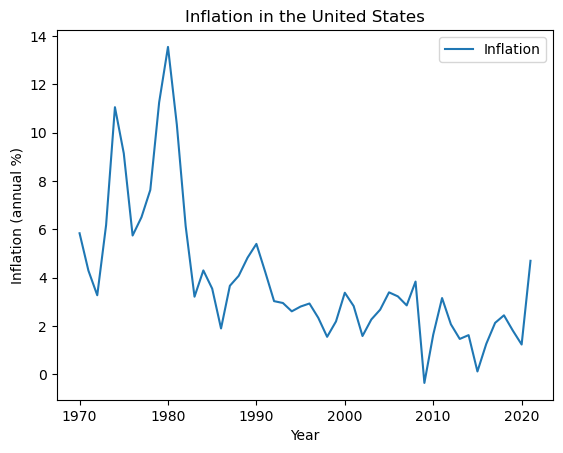

In [9]:
#US Inflation Visualization Line Graph
us_inflation.to_pandas().plot(x='Year', y='Inflation', kind='line', title='Inflation in the United States', ylabel='Inflation (annual %)')
plt.show()

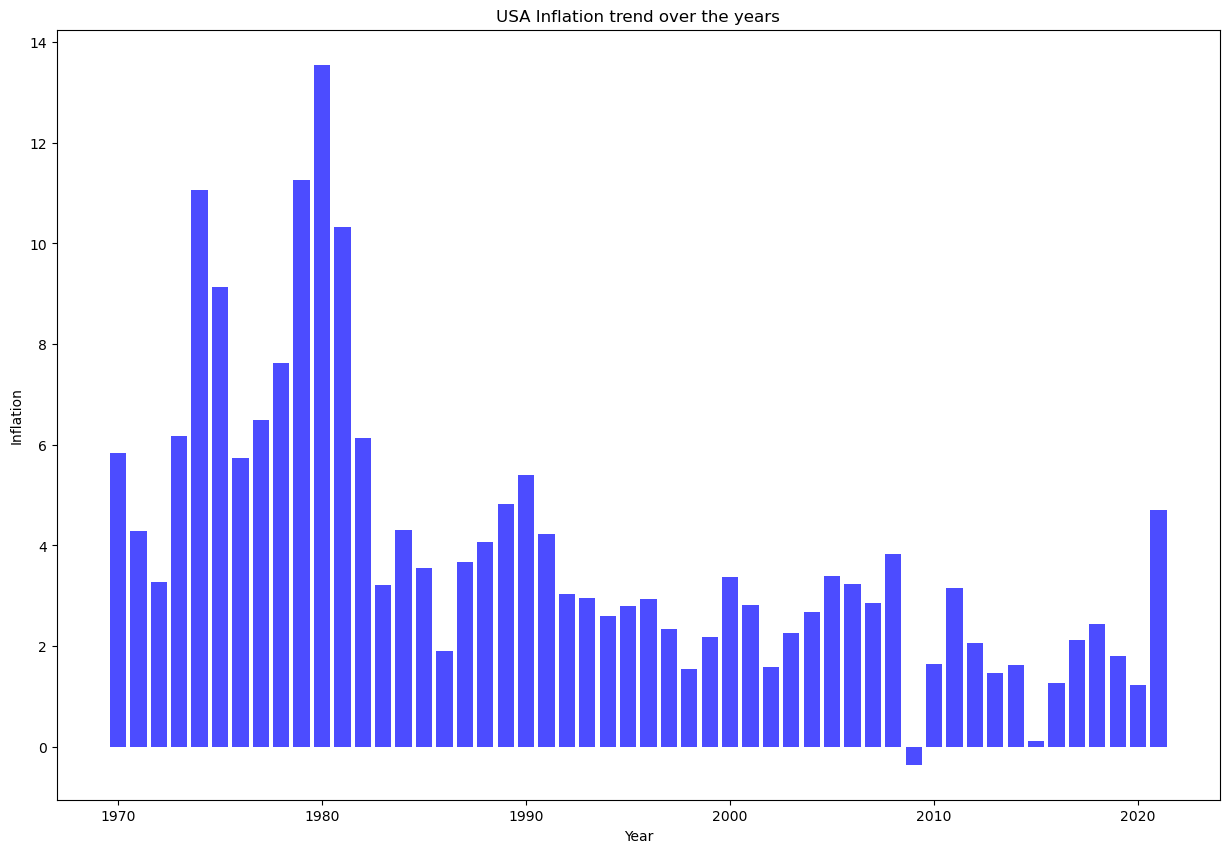

In [10]:
#US Inflation Visualization BAR Graph
plt.figure(figsize=(15, 10))
# Plotting a bar graph using polars and matplotlib
plt.bar(us_inflation['Year'], us_inflation['Inflation'], color='blue', alpha=0.7)
# Set title and labels
plt.title('USA Inflation trend over the years')
plt.xlabel('Year')
plt.ylabel('Inflation')
# Show the plot
plt.show()

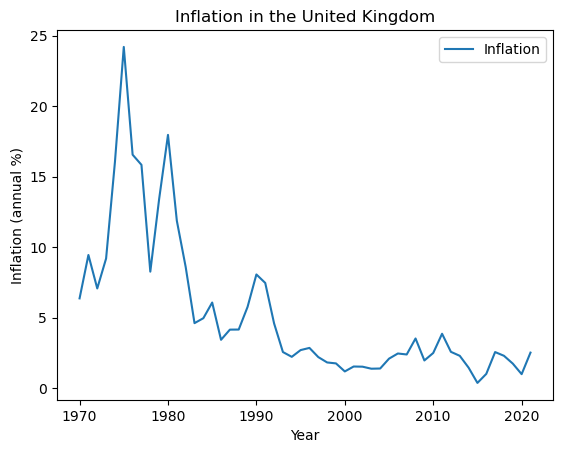

In [11]:
#UK Inflation Visualization Line Graph
uk_inflation.to_pandas().plot(x='Year', y='Inflation', kind='line', title='Inflation in the United Kingdom', ylabel='Inflation (annual %)')
plt.show()

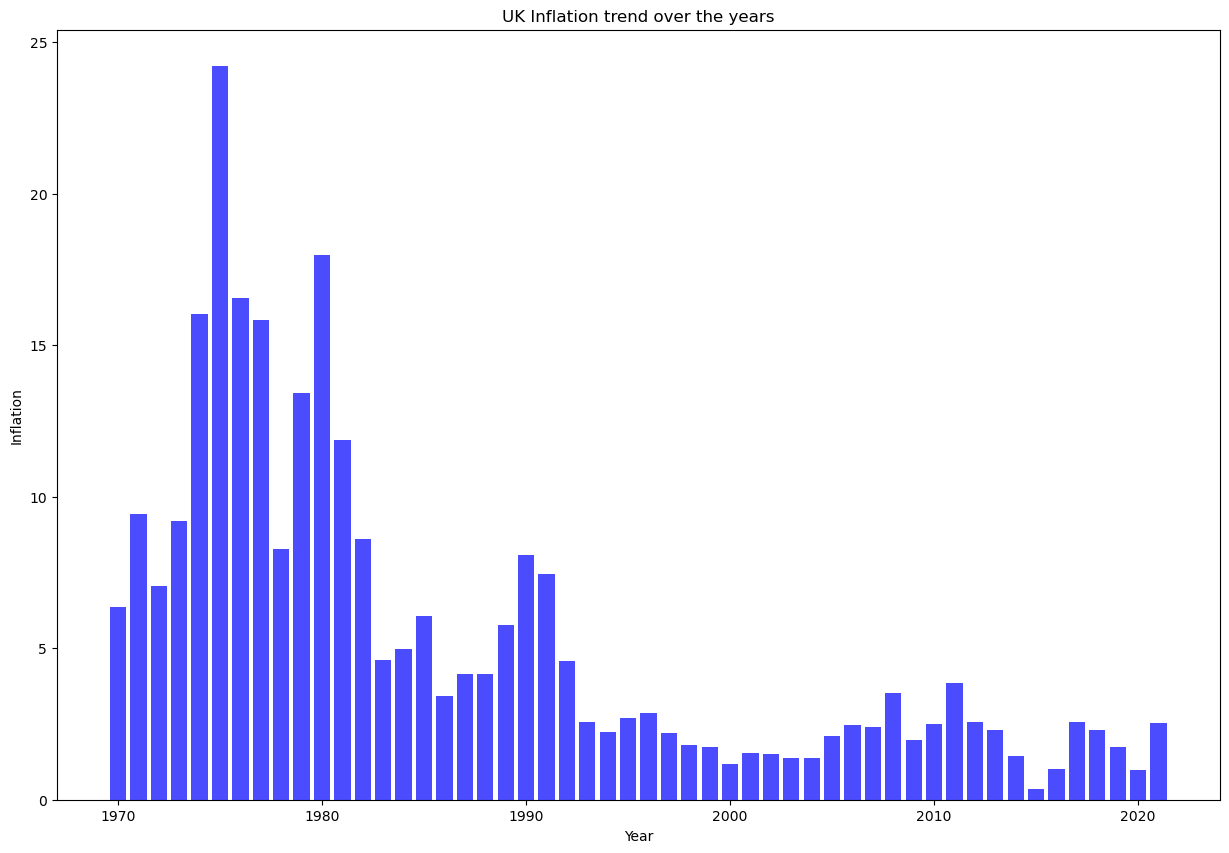

In [12]:
#Uk Inflation Visualization BAR Graph
plt.figure(figsize=(15, 10))
# Plotting a bar graph using polars and matplotlib
plt.bar(uk_inflation['Year'], uk_inflation['Inflation'], color='blue', alpha=0.7)
# Set title and labels
plt.title('UK Inflation trend over the years')
plt.xlabel('Year')
plt.ylabel('Inflation')
# Show the plot
plt.show()

In [13]:
#Built a data frame that contain Year and Untited States Interest Rate % Variables, columns renamed.
us_real_int_rate = filtered_df.filter(filtered_df['country'] == 'United States')[['year', 'Real interest rate (%)']]
# Rename columns
us_real_int_rate = us_real_int_rate.rename({'Real interest rate (%)': 'Interest %', 'year': 'Year'})
# Display the resulting DataFrame
print(us_real_int_rate)

shape: (52, 2)
┌──────┬────────────┐
│ Year ┆ Interest % │
│ ---  ┆ ---        │
│ i64  ┆ f64        │
╞══════╪════════════╡
│ 1970 ┆ 2.1854     │
│ 1971 ┆ 0.622605   │
│ 1972 ┆ 0.887229   │
│ 1973 ┆ 2.409735   │
│ …    ┆ …          │
│ 2018 ┆ 2.444494   │
│ 2019 ┆ 3.43601    │
│ 2020 ┆ 2.311111   │
│ 2021 ┆ null       │
└──────┴────────────┘


In [14]:
#Built a data frame that contain Year and United Kingdom Interest Rate % Variables, columns renamed.
uk_real_int_rate = filtered_df.filter(filtered_df['country'] == 'United Kingdom')[['year', 'Real interest rate (%)']]
# Rename columns
uk_real_int_rate = uk_real_int_rate.rename({'Real interest rate (%)': 'Interest %', 'year': 'Year'})
# Display the resulting DataFrame
print(uk_real_int_rate)

shape: (52, 2)
┌──────┬────────────┐
│ Year ┆ Interest % │
│ ---  ┆ ---        │
│ i64  ┆ f64        │
╞══════╪════════════╡
│ 1970 ┆ 1.620494   │
│ 1971 ┆ -0.449712  │
│ 1972 ┆ 0.290842   │
│ 1973 ┆ -0.382677  │
│ …    ┆ …          │
│ 2018 ┆ null       │
│ 2019 ┆ null       │
│ 2020 ┆ null       │
│ 2021 ┆ null       │
└──────┴────────────┘


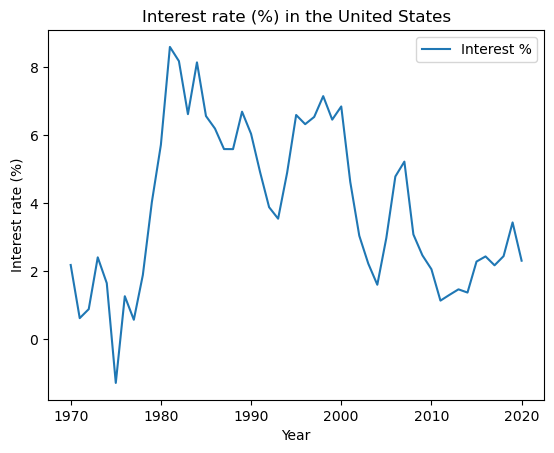

In [15]:
#US Real Interest % Visualization Line Graph
us_real_int_rate.to_pandas().plot(x='Year', y='Interest %', kind='line', title='Interest rate (%) in the United States', ylabel='Interest rate (%)')
plt.show()

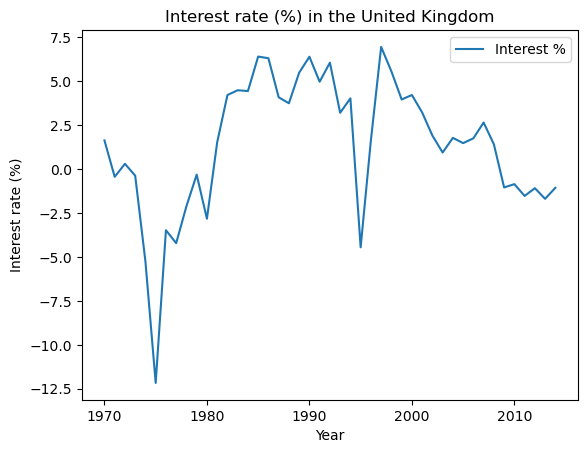

In [16]:
#UK Real Interest % Visualization Line Graph
uk_real_int_rate.to_pandas().plot(x='Year', y='Interest %', kind='line', title='Interest rate (%) in the United Kingdom', ylabel='Interest rate (%)')
plt.show()

In [17]:
#Built a data frame that contain Year and Untited States Unemployment Variables, columns renamed.
us_Unemployment = filtered_df.filter(filtered_df['country'] == 'United States')[['year', 'Unemployment, total (% of total labor force) (national estimate)']]
# Rename columns
us_Unemployment = us_Unemployment.rename({'Unemployment, total (% of total labor force) (national estimate)': 'Unemployment', 'year': 'Year'})
# Display the resulting DataFrame
print(us_Unemployment)

shape: (52, 2)
┌──────┬──────────────┐
│ Year ┆ Unemployment │
│ ---  ┆ ---          │
│ i64  ┆ f64          │
╞══════╪══════════════╡
│ 1970 ┆ 4.9          │
│ 1971 ┆ 5.9          │
│ 1972 ┆ 5.6          │
│ 1973 ┆ 4.9          │
│ …    ┆ …            │
│ 2018 ┆ 3.9          │
│ 2019 ┆ 3.67         │
│ 2020 ┆ 8.05         │
│ 2021 ┆ 5.35         │
└──────┴──────────────┘


In [18]:
#Built a data frame that contain Year and United Kingdom Unemployment Variables, columns renamed.
uk_Unemployment = filtered_df.filter(filtered_df['country'] == 'United Kingdom')[['year', 'Unemployment, total (% of total labor force) (national estimate)']]
# Rename columns
uk_Unemployment = uk_Unemployment.rename({'Unemployment, total (% of total labor force) (national estimate)': 'Unemployment', 'year': 'Year'})
# Set 'Year' as the index
#us_inflation = us_inflation.set_index('Year')
# Display the resulting DataFrame
print(uk_Unemployment)

shape: (52, 2)
┌──────┬──────────────┐
│ Year ┆ Unemployment │
│ ---  ┆ ---          │
│ i64  ┆ f64          │
╞══════╪══════════════╡
│ 1970 ┆ null         │
│ 1971 ┆ 3.3          │
│ 1972 ┆ 3.7          │
│ 1973 ┆ 2.6          │
│ …    ┆ …            │
│ 2018 ┆ 4.0          │
│ 2019 ┆ 3.74         │
│ 2020 ┆ null         │
│ 2021 ┆ null         │
└──────┴──────────────┘


In [24]:
#Merge Year, Unemployment and Inflation data for United States
us_merged_table = pl.DataFrame({
    'Year': us_Unemployment['Year'],
    'Unemployment': us_Unemployment['Unemployment'],
    'Inflation': us_inflation['Inflation'],
    'Interest %': us_real_int_rate['Interest %']
    
})

print(us_merged_table)

shape: (52, 4)
┌──────┬──────────────┬───────────┬────────────┐
│ Year ┆ Unemployment ┆ Inflation ┆ Interest % │
│ ---  ┆ ---          ┆ ---       ┆ ---        │
│ i64  ┆ f64          ┆ f64       ┆ f64        │
╞══════╪══════════════╪═══════════╪════════════╡
│ 1970 ┆ 4.9          ┆ 5.838255  ┆ 2.1854     │
│ 1971 ┆ 5.9          ┆ 4.292767  ┆ 0.622605   │
│ 1972 ┆ 5.6          ┆ 3.272278  ┆ 0.887229   │
│ 1973 ┆ 4.9          ┆ 6.17776   ┆ 2.409735   │
│ …    ┆ …            ┆ …         ┆ …          │
│ 2018 ┆ 3.9          ┆ 2.442583  ┆ 2.444494   │
│ 2019 ┆ 3.67         ┆ 1.81221   ┆ 3.43601    │
│ 2020 ┆ 8.05         ┆ 1.233584  ┆ 2.311111   │
│ 2021 ┆ 5.35         ┆ 4.697859  ┆ null       │
└──────┴──────────────┴───────────┴────────────┘


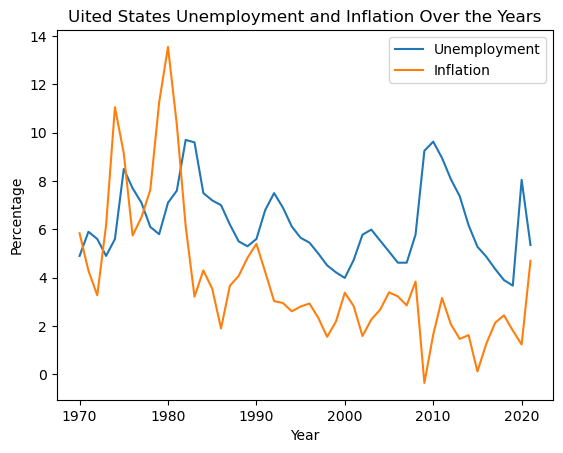

In [25]:
#Plot United States Unemployment and Inflation data over the years
us_merged_table.to_pandas().plot(x='Year', y=['Unemployment', 'Inflation'], kind='line', title='Uited States Unemployment and Inflation Over the Years', ylabel='Percentage')
plt.show()

In [26]:
#Export the final US merged data
us_merged_table.write_csv('US_data_cleaned_un_inf.csv')

In [27]:
#Merge Year, Unemployment and Inflation data for United Kingdom
uk_merged_table = pl.DataFrame({
    'Year': uk_Unemployment['Year'],
    'Unemployment': uk_Unemployment['Unemployment'],
    'Inflation': uk_inflation['Inflation'],
    'Interest %': uk_real_int_rate['Interest %']
    
})

print(uk_merged_table)

shape: (52, 4)
┌──────┬──────────────┬───────────┬────────────┐
│ Year ┆ Unemployment ┆ Inflation ┆ Interest % │
│ ---  ┆ ---          ┆ ---       ┆ ---        │
│ i64  ┆ f64          ┆ f64       ┆ f64        │
╞══════╪══════════════╪═══════════╪════════════╡
│ 1970 ┆ null         ┆ 6.366568  ┆ 1.620494   │
│ 1971 ┆ 3.3          ┆ 9.444837  ┆ -0.449712  │
│ 1972 ┆ 3.7          ┆ 7.071098  ┆ 0.290842   │
│ 1973 ┆ 2.6          ┆ 9.196033  ┆ -0.382677  │
│ …    ┆ …            ┆ …         ┆ …          │
│ 2018 ┆ 4.0          ┆ 2.29284   ┆ null       │
│ 2019 ┆ 3.74         ┆ 1.738105  ┆ null       │
│ 2020 ┆ null         ┆ 0.989487  ┆ null       │
│ 2021 ┆ null         ┆ 2.518371  ┆ null       │
└──────┴──────────────┴───────────┴────────────┘


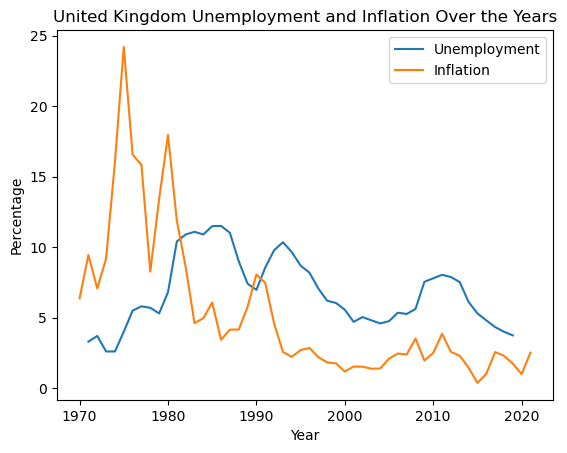

In [29]:
#Plot United Kingdom Unemployment and Inflation data over the years
uk_merged_table.to_pandas().plot(x='Year', y=['Unemployment', 'Inflation'], kind='line', title='United Kingdom Unemployment and Inflation Over the Years', ylabel='Percentage')
plt.show()

In [30]:
#Export the final UK merged data
uk_merged_table.write_csv('UK_data_cleaned_un_inf.csv')